<a href="https://colab.research.google.com/github/KaylaBai/Dissertation/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dissertation Code

#### Load Packages

In [3]:
pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.8 MB/s eta 0:00:00


In [4]:
pip install libpysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.2 MB/s eta 0:00:00


In [5]:
pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122762 sha256=ee2a6fcbf8e43bce05d147e68bad813525c5d870d9beeb73446e9166439a459f
  Stored in directory: /root/.cache/pip/wheels/ed/88/61/8705bb427b9aeb4ded8f07eb8ea3e8cada26881368c75619cb
Successfully built esda


In [6]:
pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 7.9 MB/s eta 

In [7]:
# pip install geopandas shapely

In [12]:
# For processing data
import pandas as pd
import numpy as np
import geopandas as gpd
import numpy.linalg as la
from scipy import stats

# For Regression
from linearmodels import PooledOLS
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels.panel import compare

# For spatial analysis
import libpysal
import esda
import pysal as ps

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

### Geo Data

In [7]:
# Read Province boundaries shapefile
file_path = "https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/Province/province_boundaries.shp"
# provinces = gpd.read_file("/content/province_boundaries.shp").loc[:,["NAME","geometry"]]
provinces = gpd.read_file(file_path).loc[:,["NAME","geometry"]]
provinces
# check the coordinate refrencing system
# print(provinces.crs)

,NAME,geometry
0,Heilongjiang,"POLYGON ((1329152.341 5619034.278, 1323327.591..."
1,Xinjiang,"POLYGON ((-2189253.375 4611401.367, -2202922.3..."
2,Shanxi,"POLYGON ((761692.092 4443124.843, 760999.873 4..."
3,Ningxia,"POLYGON ((-34477.046 4516813.963, -41105.128 4..."
4,Tibet,"POLYGON ((-2189253.375 4611401.367, -2187861.9..."
5,Shandong,"POLYGON ((915805.657 4438424.999, 917551.296 4..."
6,Henan,"POLYGON ((915805.657 4438424.999, 913869.987 4..."
7,Jiangsu,"POLYGON ((1261146.339 4381810.235, 1264548.546..."
8,Anhui,"POLYGON ((1016688.415 4289114.800, 1018854.016..."
9,Hubei,"POLYGON ((547929.620 4087821.980, 551532.202 4..."


The coordinate referencing system used here is China_Lambert_Conformal_Conic.

In [8]:
# Define the mapping dictionary of provinces to regions
region_mapping = {'North China':['Beijing','Tianjin','Hebei','Shanxi','Inner Mongolia'],
                  'East China':['Shanghai', 'Jiangsu','Zhejiang','Anhui','Fujian','Taiwan','Jiangxi','Shandong'],
                  'South Central China':['Henan','Hubei','Hunan','Guangdong','Guangxi','Hainan','Hong Kong','Macau'],
                  'Southwest China':['Chongqing','Sichuan','Guizhou','Yunnan','Tibet'],
                  'Northwest China':['Shaanxi','Gansu','Qinghai','Ningxia','Xinjiang'],
                  'Northeast China':['Liaoning','Jilin','Heilongjiang']
}


# Map provinces to regions using the region_mapping dictionary
provinces['Area'] = provinces['NAME'].apply(lambda province: next((region for region, provinces in region_mapping.items() if province in provinces), None))

# Reorder the columns with "Region" before "geometry"
provinces = provinces[['NAME', 'Area', 'geometry']]

provinces

,NAME,Area,geometry
0,Heilongjiang,Northeast China,"POLYGON ((1329152.341 5619034.278, 1323327.591..."
1,Xinjiang,Northwest China,"POLYGON ((-2189253.375 4611401.367, -2202922.3..."
2,Shanxi,North China,"POLYGON ((761692.092 4443124.843, 760999.873 4..."
3,Ningxia,Northwest China,"POLYGON ((-34477.046 4516813.963, -41105.128 4..."
4,Tibet,Southwest China,"POLYGON ((-2189253.375 4611401.367, -2187861.9..."
5,Shandong,East China,"POLYGON ((915805.657 4438424.999, 917551.296 4..."
6,Henan,South Central China,"POLYGON ((915805.657 4438424.999, 913869.987 4..."
7,Jiangsu,East China,"POLYGON ((1261146.339 4381810.235, 1264548.546..."
8,Anhui,East China,"POLYGON ((1016688.415 4289114.800, 1018854.016..."
9,Hubei,South Central China,"POLYGON ((547929.620 4087821.980, 551532.202 4..."


In [9]:
bd = provinces.drop([30,31,32],axis = 0).reset_index(drop = True)
bd

,NAME,Area,geometry
0,Heilongjiang,Northeast China,"POLYGON ((1329152.341 5619034.278, 1323327.591..."
1,Xinjiang,Northwest China,"POLYGON ((-2189253.375 4611401.367, -2202922.3..."
2,Shanxi,North China,"POLYGON ((761692.092 4443124.843, 760999.873 4..."
3,Ningxia,Northwest China,"POLYGON ((-34477.046 4516813.963, -41105.128 4..."
4,Tibet,Southwest China,"POLYGON ((-2189253.375 4611401.367, -2187861.9..."
5,Shandong,East China,"POLYGON ((915805.657 4438424.999, 917551.296 4..."
6,Henan,South Central China,"POLYGON ((915805.657 4438424.999, 913869.987 4..."
7,Jiangsu,East China,"POLYGON ((1261146.339 4381810.235, 1264548.546..."
8,Anhui,East China,"POLYGON ((1016688.415 4289114.800, 1018854.016..."
9,Hubei,South Central China,"POLYGON ((547929.620 4087821.980, 551532.202 4..."


In [10]:
bd.to_file("bd.geojson",crs = bd.crs)

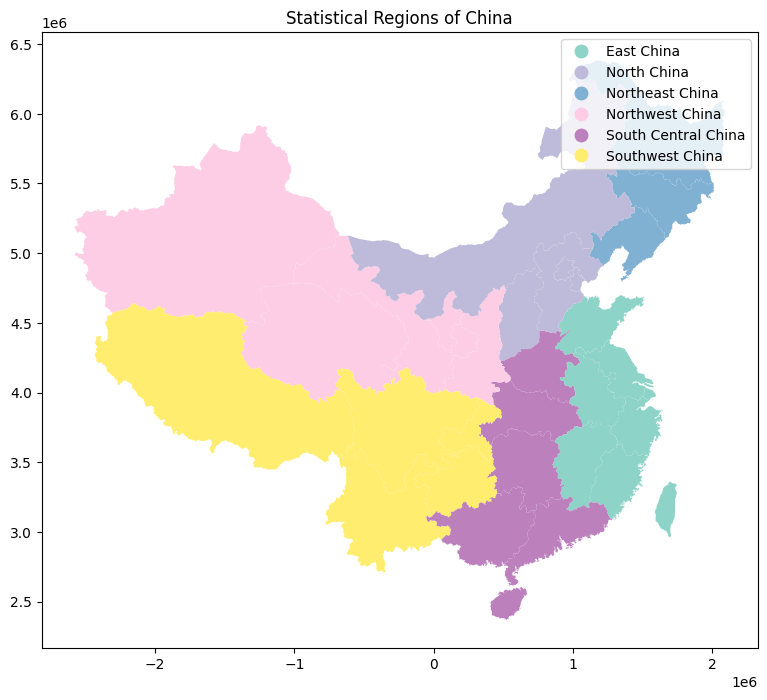

In [11]:
# Plot provinces with different colors for each region and add a legend
fig, ax = plt.subplots(figsize=(10, 8))
provinces.plot(column='Area', legend=True, ax=ax, cmap='Set3')
plt.title('Statistical Regions of China')
plt.show()

### GRP

In [12]:
# Read the CSV file into a DataFrame
df_GRP = pd.read_csv("https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/grp_data.csv", index_col=0, header=0).iloc[:, ::-1]

df_GRP.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,5267.2,6252.5,7149.8,8387.0,10425.5,11813.1,12900.9,14964.0,17188.8,19024.7,21134.6,22926.0,24779.1,27041.2,29883.0,33106.0,35445.1,35943.3,41045.6,41610.9
Tianjin,2257.8,2621.1,3158.6,3538.2,4158.4,5182.4,5709.6,6830.8,8112.5,9043.0,9945.4,10640.6,10879.5,11477.2,12450.6,13362.9,14055.5,14008.0,15685.1,16311.3
Hebei,6333.6,7588.6,8773.4,10043.0,12152.9,14200.1,15306.9,18003.6,21384.7,23077.5,24259.6,25208.9,26398.4,28474.1,30640.8,32494.6,34978.6,36013.8,40397.1,42370.4
Shanxi,2854.3,3496.0,4079.4,4713.6,5935.6,7223.0,7147.6,8903.9,10894.4,11683.1,11987.2,12094.7,11836.4,11946.4,14484.3,15958.1,16961.6,17835.6,22870.4,25642.6
Inner Mongolia,2388.4,2942.4,3523.7,4161.8,5166.9,6242.4,7104.2,8199.9,9458.1,10470.1,11392.4,12158.2,12949.0,13789.3,14898.1,16140.8,17212.5,17258.0,21166.0,23158.6


In [13]:

# Create a new DataFrame 'GRP_growth' to store the calculated growth rates
GRP_growth = pd.DataFrame(index=df_GRP.index, columns=df_GRP.columns)

# Calculate the growth rate for each province and year combination
GRP_growth = df_GRP.pct_change(axis=1) * 100
GRP_growth.head()


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,NaN,18.706334,14.351060,17.303981,24.305473,13.309673,9.208421,15.991908,14.867682,10.680792,11.090319,8.476148,8.082963,9.129064,10.509149,10.785396,7.065487,1.405554,14.195413,1.377249
Tianjin,NaN,16.090885,20.506658,12.017983,17.528687,24.624856,10.172893,19.637102,18.763542,11.469954,9.978989,6.990166,2.245174,5.493819,8.481163,7.327358,5.183007,-0.337946,11.972444,3.992324
Hebei,NaN,19.814955,15.612893,14.471015,21.008663,16.845362,7.794311,17.617545,18.780133,7.915940,5.122305,3.913090,4.718572,7.862977,7.609371,6.050103,7.644347,2.959524,12.171168,4.884757
Shanxi,NaN,22.481869,16.687643,15.546404,25.924983,21.689467,-1.043888,24.571884,22.355372,7.239499,2.602905,0.896790,-2.135646,0.929337,21.244057,10.175155,6.288343,5.152816,28.228935,12.121345
Inner Mongolia,NaN,23.195445,19.755982,18.108806,24.150608,20.815189,13.805588,15.423271,15.344090,10.699823,8.808894,6.722025,6.504252,6.489304,8.041017,8.341332,6.639696,0.264343,22.644571,9.414155


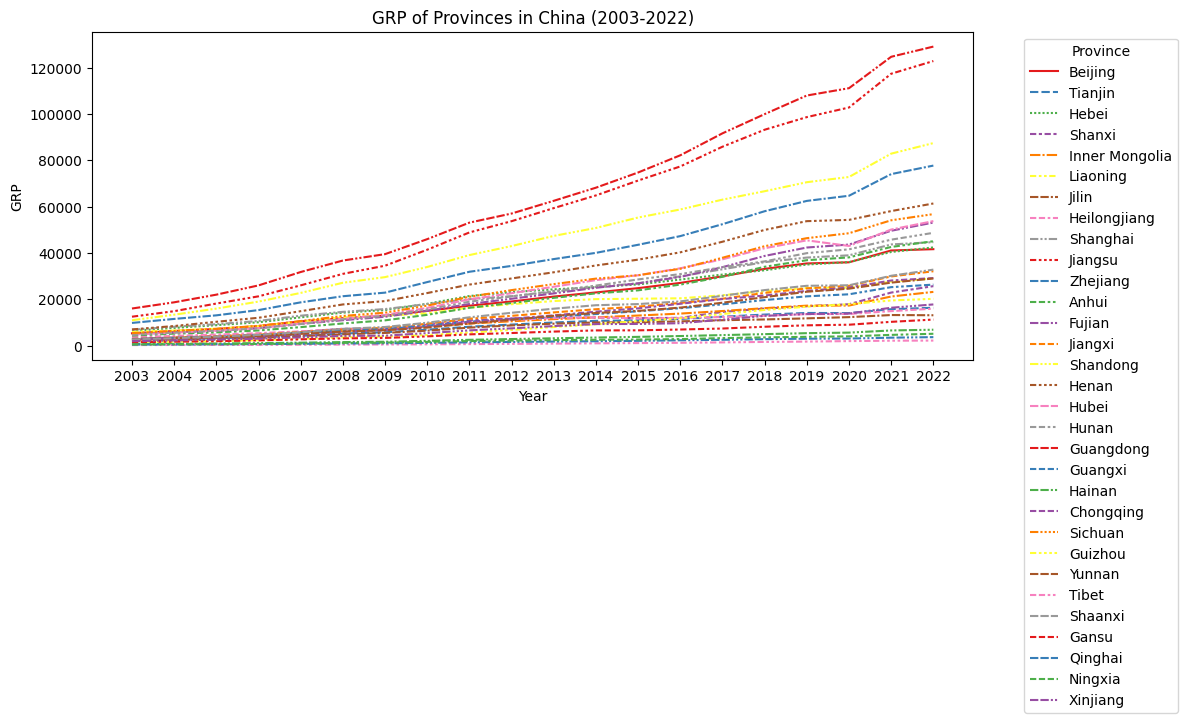

In [14]:
#Draw line plots for each province using Seaborn
plt.figure(figsize=(12, 6))
sns.set_palette("Set1", n_colors=len(df_GRP))
sns.lineplot(data=df_GRP.T)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('GRP of Provinces in China (2003-2022)')
plt.xlabel('Year')
plt.ylabel('GRP')
plt.tight_layout()
plt.show()

### GRP per capita

In [15]:
#Read the CSV file into a DataFrame
df_GRPpc = pd.read_csv("https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/grp_pc.csv", index_col=0, header=0).iloc[:, ::-1]

df_GRPpc.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,36583,42402,47182,53438,63629,68541,71059,78307,86246,92758,100569,106732,113692,123391,136172,150962,161776,164158,187526,190313
Tianjin,22371,25761,30567,33411,37976,45242,47497,54053,61458,66517,71345,74960,75868,79647,87280,95689,101557,101068,113660,119235
Hebei,9380,11178,12845,14609,17561,20385,21831,25308,29647,31844,33346,34507,35994,38688,41451,43808,47036,48302,54181,56995
Shanxi,8639,10515,12195,14008,17542,21234,20906,25434,30534,32864,33848,34248,33593,33972,41242,45517,48469,51051,65625,73675
Inner Mongolia,10015,12315,14695,17275,21334,25620,28982,33262,38276,42441,46320,49585,52972,56560,61196,66491,71170,71640,88137,96474


In [16]:
# # LLC test for
# from statsmodels.tsa.stattools import adfuller

# def llc_test(series):
#     result = adfuller(series)
#     return result[1]  # 返回p值

# p_values = df_GRPpc.T.apply(llc_test)
# p_values


In [17]:

#Create a new DataFrame 'GRPpc_growth' to store the calculated growth rates
GRPpc_growth = pd.DataFrame(index=df_GRPpc.index, columns=df_GRPpc.columns)

#Calculate the growth rate for each province and year combination
GRPpc_growth = df_GRPpc.pct_change(axis=1) * 100
GRPpc_growth.head()

# Display the 'GRPpc_growth' DataFrame
GRPpc_growth.head()


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,NaN,15.906295,11.273053,13.259294,19.070699,7.719750,3.673714,10.199975,10.138302,7.550495,8.420837,6.128131,6.521006,8.530943,10.358130,10.861264,7.163392,1.472406,14.235066,1.486194
Tianjin,NaN,15.153547,18.656108,9.304152,13.663165,19.133137,4.984307,13.802977,13.699517,8.231638,7.258295,5.066928,1.211313,4.981020,9.583537,9.634510,6.132366,-0.481503,12.458939,4.904980
Hebei,NaN,19.168443,14.913222,13.732970,20.206722,16.081089,7.093451,15.926893,17.144776,7.410531,4.716744,3.481677,4.309271,7.484581,7.141749,5.686232,7.368517,2.691555,12.171339,5.193703
Shanxi,NaN,21.715476,15.977175,14.866749,25.228441,21.046631,-1.544692,21.658854,20.051899,7.630838,2.994158,1.181754,-1.912520,1.128211,21.399976,10.365647,6.485489,5.327116,28.547923,12.266667
Inner Mongolia,NaN,22.965552,19.326025,17.556992,23.496382,20.089997,13.122560,14.767787,15.074259,10.881492,9.139747,7.048791,6.830695,6.773390,8.196605,8.652526,7.037043,0.660391,23.027638,9.459137


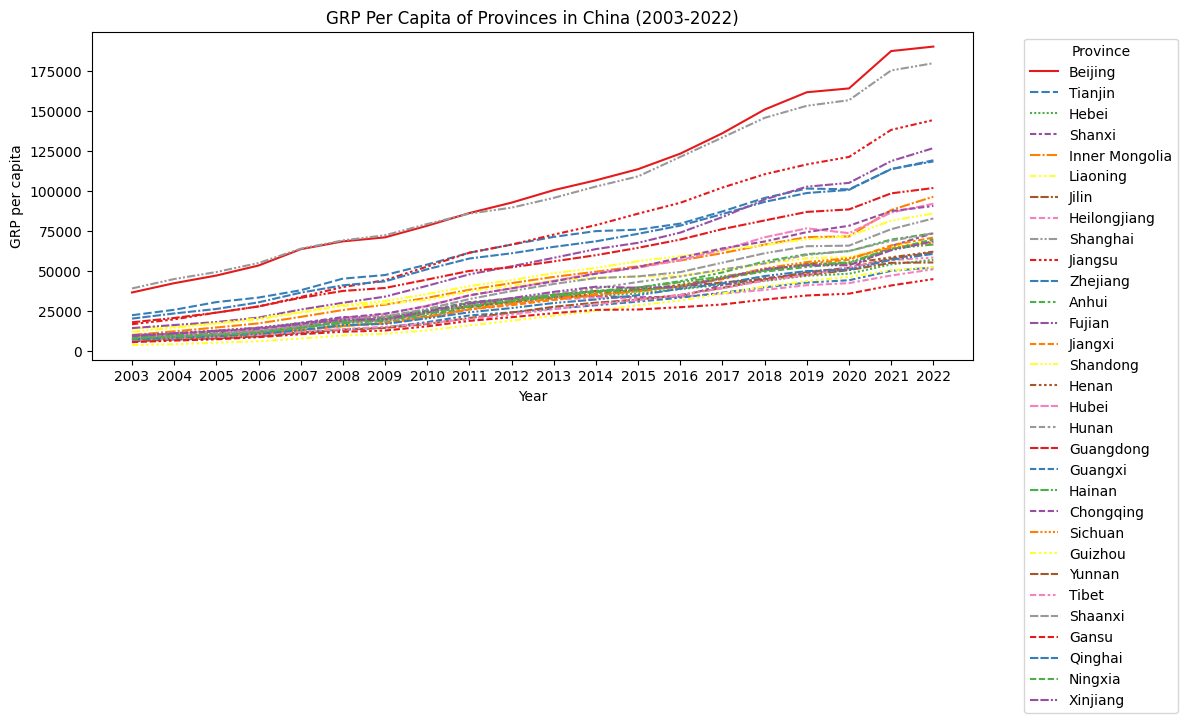

In [18]:
#Draw line plots for each province using Seaborn
plt.figure(figsize=(12, 6))
sns.set_palette("Set1", n_colors=len(df_GRPpc))
sns.lineplot(data=df_GRPpc.T)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('GRP Per Capita of Provinces in China (2003-2022)')
plt.xlabel('Year')
plt.ylabel('GRP per capita')
plt.tight_layout()
plt.show()

### Resource Dependence

In [8]:
# Read data
df_mining_inv = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/fixedinv_mining.csv', index_col='Region')
df_all_inv = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/fixedinv_all.csv', index_col='Region')

df_mining_inv = df_mining_inv.iloc[:, ::-1]
df_all_inv = df_all_inv.iloc[:, ::-1]

# Calculate the proportion of fixed investment in mining to total fixed investment for each year and province
RD = df_mining_inv.div(df_all_inv) *100

# check the result
RD.head()


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Region,,,,,,,,,,,,,,
Beijing,0.217546,0.155631,0.224487,0.312244,0.804782,0.500336,0.172127,0.155945,0.070349,0.132903,0.103983,0.034685,0.036506,0.037035
Tianjin,9.512724,8.313825,10.068662,7.700480,7.917871,8.330168,4.915500,3.218869,2.507940,3.596854,2.993858,2.240534,0.857630,1.540451
Hebei,1.854728,3.239365,4.429454,4.235479,4.024090,2.904693,2.915125,3.514488,3.155946,2.979193,2.473765,1.907071,1.393386,1.140786
Shanxi,11.981439,16.188547,15.578313,14.352612,15.048709,13.928225,17.629305,20.159477,17.845498,13.370317,11.451698,10.024726,7.427807,7.780813
Inner Mongolia,6.152125,9.744288,12.134277,13.533353,16.691018,13.158325,11.123061,9.412264,9.400709,11.163785,9.674962,6.886485,5.995358,6.595210


In [44]:
RD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Beijing to Xinjiang
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2004    31 non-null     float64
 1   2005    31 non-null     float64
 2   2006    31 non-null     float64
 3   2007    31 non-null     float64
 4   2008    31 non-null     float64
 5   2009    31 non-null     float64
 6   2010    31 non-null     float64
 7   2011    31 non-null     float64
 8   2012    31 non-null     float64
 9   2013    31 non-null     float64
 10  2014    31 non-null     float64
 11  2015    31 non-null     float64
 12  2016    31 non-null     float64
 13  2017    31 non-null     float64
dtypes: float64(14)
memory usage: 3.6+ KB


### Control Variables


**Foreign Direct Investment(FDI)**      \
Use the total investment of foreign funded enterprises to stand for Foreign direct investment.外商投资企业投资总额（Foreign Invested Enterprises Total Investment）和外商直接投资（Foreign Direct Investment，FDI）不完全相同，但它们之间存在一定的关联。

外商投资企业投资总额是指外国投资者在中国设立的企业的累计总投资金额，包括注册资本、股权、债券等形式的投资。这个概念更加广泛，不仅包括外商直接投资，还包括其他形式的外国投资。这些投资可以通过设立独资企业、合资企业、合作企业等方式进行。

外商直接投资是指外国投资者通过购买股权、设立合资企业等方式，在其他国家或地区直接投资。在中国的情况下，外商直接投资通常是指外国投资者在中国境内设立企业或购买已有企业的股权，以及其他类似的直接投资活动。

因此，外商投资企业投资总额包含了外商直接投资，但外商投资企业投资总额的范围更广，还包括其他形式的外国投资。

In [45]:
# Step 1: Read the CSV file into a DataFrame.
df_FDI = pd.read_csv("https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/FDI.csv", index_col=0, header=0).iloc[:, ::-1]

df_FDI.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Region,,,,,,,,,,,,,,,,,,,
Beijing,46328,53162,60670,69700,87621,98295,106600,119206,134364,149355,177105,201027,380963,427371,486409,547718,599561,646907,717181
Tianjin,41555,47045,56770,68600,82888,93814,97700,109624,114806,118913,127423,144146,181328,222594,254823,290620,310544,306423,1021673
Hebei,17519,20057,21930,24700,29113,33841,37000,40348,45700,48960,54542,62135,73624,84821,95818,108665,158991,225402,235381
Shanxi,6119,6913,7710,11100,17787,18000,20500,22929,31899,31963,34182,39119,41107,42163,49724,63011,70136,92559,89039
Inner Mongolia,3836,10811,12640,14800,17148,22155,24000,23243,25519,25802,22911,26449,35142,41080,45979,44853,58421,56084,60615


**Urbanization**\
城镇化水平由各省的城镇人口与年末常住人口之比表示。

In [46]:
# Read data
population = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/population.csv', index_col='Region').iloc[:, ::-1].iloc[:,2:-1]
population_urb = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/urban_population.csv', index_col='Region').iloc[:, ::-1]



# Calculate the proportion of the urban population to total population for each year and province
urb = population_urb.div(population) * 100

# check the result
urb.head()


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Region,,,,,,,,,,,,,,,,,
Beijing,83.615085,84.322299,84.486874,84.923772,85.000000,85.932722,86.215415,86.284889,86.400000,86.503915,86.700183,86.742597,86.918870,87.089416,87.351598,87.528552,87.528552
Tianjin,75.071908,75.720930,76.322870,77.210884,78.013029,79.599692,80.462342,81.567489,82.269504,82.575227,82.904795,83.298683,83.546099,83.947939,84.332130,84.715213,84.850692
Hebei,37.687929,38.764859,40.256373,41.894405,43.744669,44.495413,45.589049,46.598733,48.024149,49.365014,51.667801,53.871186,55.743015,57.325613,58.775346,60.075027,61.143931
Shanxi,42.116244,42.992593,44.031830,45.118734,45.987744,48.041410,49.803481,51.324690,52.871287,54.308390,55.868144,57.256688,58.603989,59.851513,61.281098,62.521490,63.419540
Inner Mongolia,47.191011,48.654244,50.144092,51.718494,53.417413,55.501618,57.044534,58.400974,59.837067,60.963659,62.090164,63.382594,64.611591,65.524360,66.459627,67.498960,68.208333


国家统计局从2006年开始公布各省市的人口城乡构成，因此数据从2005开始。需要舍弃2003及2004年的数据。2022年城镇人口数尚未公布，因此同样为NULL。

**Innovation**\
Represented by the number of domestic patents application accepted.

In [47]:
# Read in data
df_patent = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/patents.csv', index_col='Region').iloc[:,::-1]

df_patent.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Region,,,,,,,,,,,,,,,,,,,
Beijing,17003,18402,22572,26555,31680,43508,50236,57296,77955,92305,123336,138111,156312,189129,185928,211212,226113,254165,283134
Tianjin,6812,8406,11657,13299,15744,18230,19624,25973,38489,41009,60915,63422,79963,106514,86996,99038,96045,111514,90471
Hebei,5623,5647,6401,7220,7853,9128,11361,12295,17595,23241,27619,30000,44060,54838,61288,83785,101274,125608,130705
Shanxi,1743,1949,1985,2824,3333,5386,6822,7927,12769,16786,18859,15687,14948,20031,20697,27106,31705,40302,40460
Inner Mongolia,1393,1457,1455,1946,2015,2221,2484,2912,3841,4732,6388,6359,8876,10672,11701,16426,21069,26224,29462


### Merge data

In [48]:
# Turn GRP per capita data into long data
GRPpc_0517 = df_GRPpc.iloc[:,2:-5]
GRPpc_0517_long = GRPpc_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='GRPpc')
GRPpc_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Region  403 non-null    object
 1   Year    403 non-null    object
 2   GRPpc   403 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.6+ KB


In [49]:
# Turn GRP per capita growth rate data into long data
GRPpc_growth_0517 = GRPpc_growth.iloc[:,2:-5]
GRPpc_growth_0517_long = GRPpc_growth_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='GRPpcGrowth')
GRPpc_growth_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       403 non-null    object 
 1   Year         403 non-null    object 
 2   GRPpcGrowth  403 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.6+ KB


In [50]:
# Turn Resource Dependence data into long data
RD_0517 = RD.iloc[:,1::]
RD_0517_long = RD_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='RD')
RD_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  403 non-null    object 
 1   Year    403 non-null    object 
 2   RD      403 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.6+ KB


In [51]:
# Turn FDI data into long data
FDI_0517 = df_FDI.iloc[:,2:-4]
FDI_0517_long = FDI_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='FDI')
FDI_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Region  403 non-null    object
 1   Year    403 non-null    object
 2   FDI     403 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.6+ KB


In [52]:
# Turn urbanization data into long data
urb_0517 = urb.iloc[:,0:-4]
urb_0517_long = urb_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='URB')
urb_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  403 non-null    object 
 1   Year    403 non-null    object 
 2   URB     403 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.6+ KB


In [53]:
# Turn df_patent into long data
patent_0517 = df_patent.iloc[:,2:-4]
pat_0517_long = patent_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='INN')
patent_0517.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Region,,,,,,,,,,,,,
Beijing,22572,26555,31680,43508,50236,57296,77955,92305,123336,138111,156312,189129,185928
Tianjin,11657,13299,15744,18230,19624,25973,38489,41009,60915,63422,79963,106514,86996
Hebei,6401,7220,7853,9128,11361,12295,17595,23241,27619,30000,44060,54838,61288
Shanxi,1985,2824,3333,5386,6822,7927,12769,16786,18859,15687,14948,20031,20697
Inner Mongolia,1455,1946,2015,2221,2484,2912,3841,4732,6388,6359,8876,10672,11701


In [54]:
# Merge the dataframes based on "Region" and "Year"
df = pd.merge(RD_0517_long, GRPpc_growth_0517_long, on=['Region', 'Year'])
df = df.merge(GRPpc_0517_long, how="left", on=['Region', 'Year'])
df = df.merge(FDI_0517_long, how="left", on=['Region', 'Year'])
df = df.merge(urb_0517_long, how="left", on=['Region', 'Year'])
df = df.merge(pat_0517_long, how="left", on=['Region', 'Year'])
df = df.merge(bd, how="left",left_on="Region",right_on="NAME").drop(["NAME"],axis=1)
gdf = gpd.GeoDataFrame(df, geometry="geometry")
# gdf['year'] = gdf["Year"]
# gdf['region'] = gdf["Region"]
gdf['Year'] = pd.to_numeric(gdf['Year'])
gdf.set_index(['Region', 'Year'], inplace=True)
# gdf.rename(columns = {'region':'Region', 'year':'Year'},inplace = True)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 403 entries, ('Beijing', 2005) to ('Xinjiang', 2017)
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   RD           403 non-null    float64 
 1   GRPpcGrowth  403 non-null    float64 
 2   GRPpc        403 non-null    int64   
 3   FDI          403 non-null    int64   
 4   URB          403 non-null    float64 
 5   INN          403 non-null    int64   
 6   Area         403 non-null    object  
 7   geometry     403 non-null    geometry
dtypes: float64(3), geometry(1), int64(3), object(1)
memory usage: 28.0+ KB


In [55]:
gdf = gdf[['Area','GRPpc','GRPpcGrowth','RD','FDI','URB','INN','geometry']]
# Print the updated GeoDataFrame
gdf.info()
# Export GeoDataFrame as a shapefile
# gdf.to_file("/Users/kerubai/Desktop/Merged_data/output_shapefile.shp")

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 403 entries, ('Beijing', 2005) to ('Xinjiang', 2017)
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Area         403 non-null    object  
 1   GRPpc        403 non-null    int64   
 2   GRPpcGrowth  403 non-null    float64 
 3   RD           403 non-null    float64 
 4   FDI          403 non-null    int64   
 5   URB          403 non-null    float64 
 6   INN          403 non-null    int64   
 7   geometry     403 non-null    geometry
dtypes: float64(3), geometry(1), int64(3), object(1)
memory usage: 28.0+ KB


## Exploratory Spatial Data Analysis

### Mapping

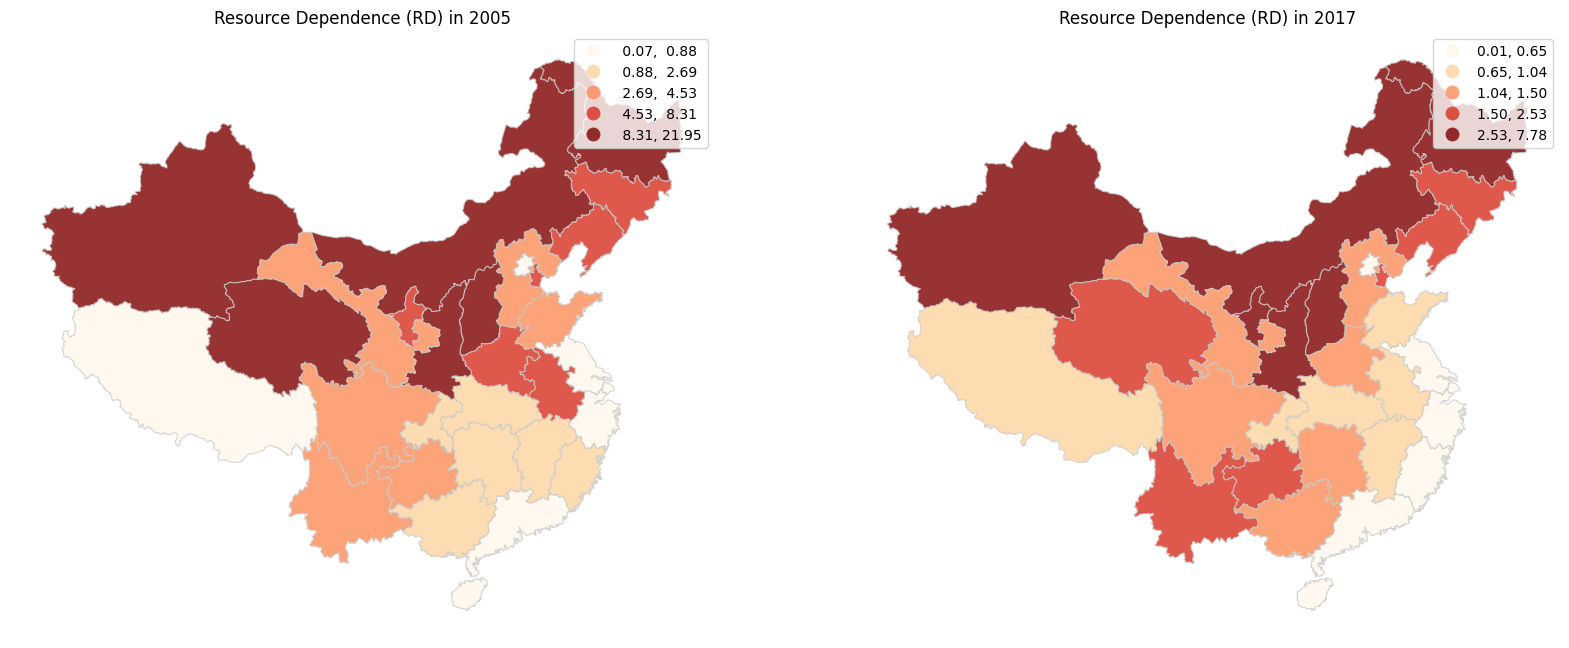

In [57]:
# Filter the df_merged dataframe for the year 2005 and 2017
gdf_2005 = gdf[gdf.index.get_level_values("Year")== 2005]
gdf_2017 = gdf[gdf.index.get_level_values("Year")== 2017]
# Plotting choropleth maps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Choropleth map for RD values at year 2005
gdf_2005.plot(column="RD", cmap="OrRd", linewidth=0.8, ax=ax1, edgecolor="0.8", alpha = 0.8,scheme="quantiles", legend=True)
ax1.set_title("Resource Dependence (RD) in 2005")
ax1.axis("off")

# Choropleth map for RD values at year 2017
gdf_2017.plot(column="RD", cmap="OrRd", linewidth=0.8, ax=ax2, edgecolor="0.8", alpha = 0.8, scheme="quantiles", legend=True)
ax2.set_title("Resource Dependence (RD) in 2017")
ax2.axis("off")

# Show the plot
plt.show()

In [58]:
 # # Plotting choropleth maps side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# # Choropleth map for GRPpc growth rate at year 2005
# gdf_2005.plot(column="GRPpcGrowth", cmap="OrRd", linewidth=0.8, ax=ax1, edgecolor="0.8", legend=True)
# ax1.set_title("GRP per capita Growth Rate in 2005")
# ax1.axis("off")

# # Choropleth map for GRPpc growth rate at year 2017
# gdf_2017.plot(column="GRPpcGrowth", cmap="OrRd", linewidth=0.8, ax=ax2, edgecolor="0.8", legend=True)
# ax2.set_title("GRP per capita Growth Rate in 2017")
# ax2.axis("off")

# # Show the plot
# plt.show()

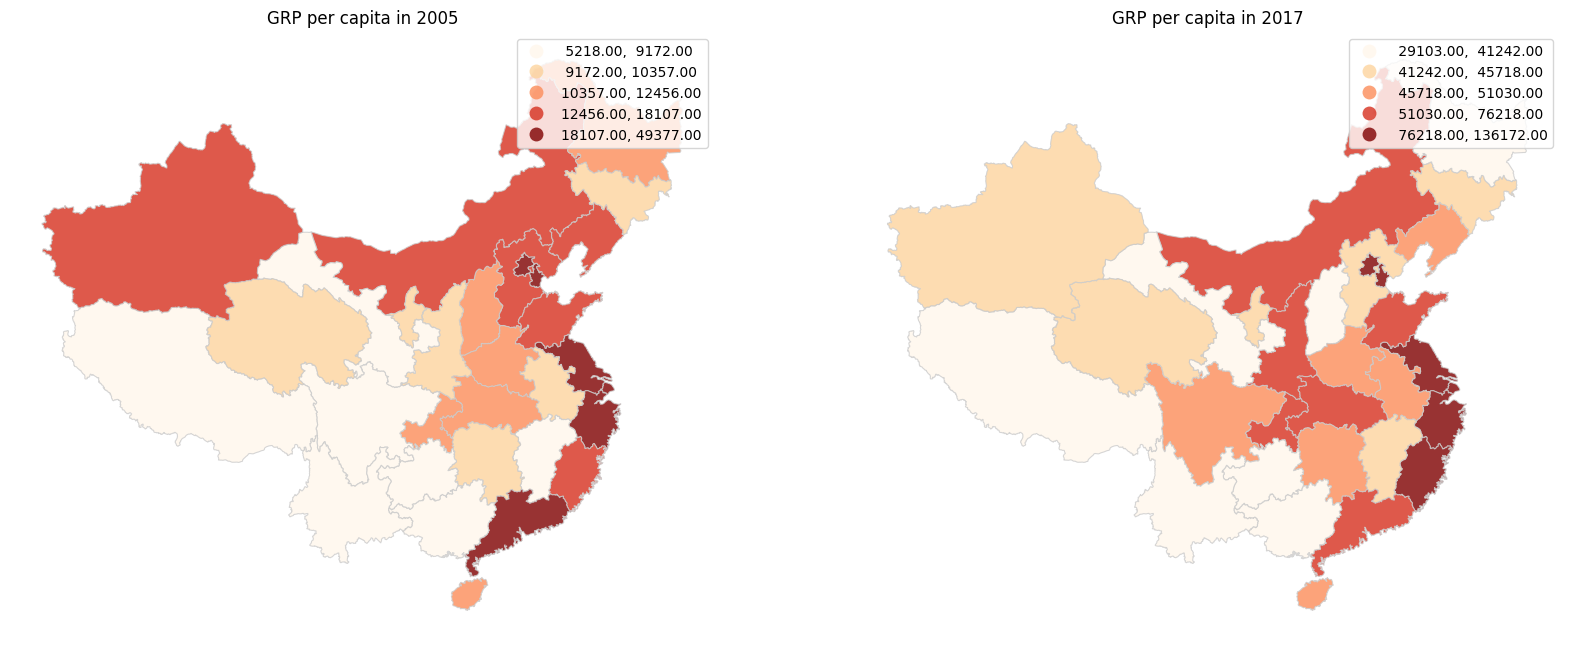

In [59]:
# Plotting choropleth maps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Choropleth map for GRPpc at year 2005
gdf_2005.plot(column="GRPpc", cmap="OrRd", linewidth=0.8, ax=ax1, edgecolor="0.8", alpha = 0.8,scheme="quantiles",legend=True)
ax1.set_title("GRP per capita in 2005")
ax1.axis("off")

# Choropleth map for GRPpc at year 2017
gdf_2017.plot(column="GRPpc", cmap="OrRd", linewidth=0.8, ax=ax2, edgecolor="0.8", alpha = 0.8, scheme="quantiles",legend=True)
ax2.set_title("GRP per capita in 2017")
ax2.axis("off")

# Show the plot
plt.show()

### Regional Comparison

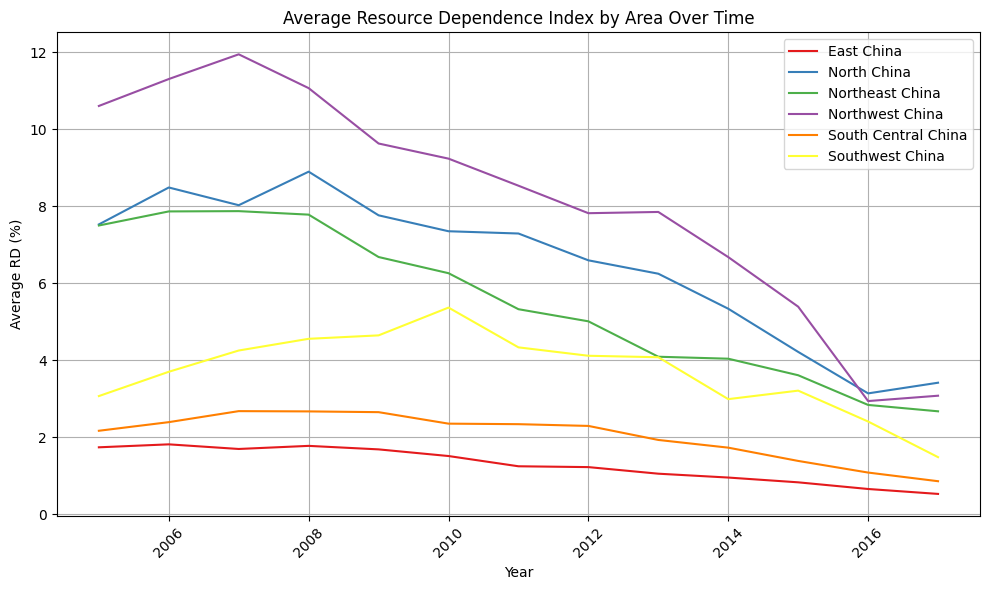

In [56]:
# 按照Area分组计算每组每年的RD平均值
area_mean_RD = gdf.groupby(['Area', 'Year'])['RD'].mean().unstack()

# 绘制折线图
plt.figure(figsize=(10, 6))

for area in area_mean_RD.index:
    plt.plot(area_mean_RD.columns, area_mean_RD.loc[area], label=area)

plt.xlabel('Year')
plt.ylabel('Average RD (%)')
plt.title('Average Resource Dependence Index by Area Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

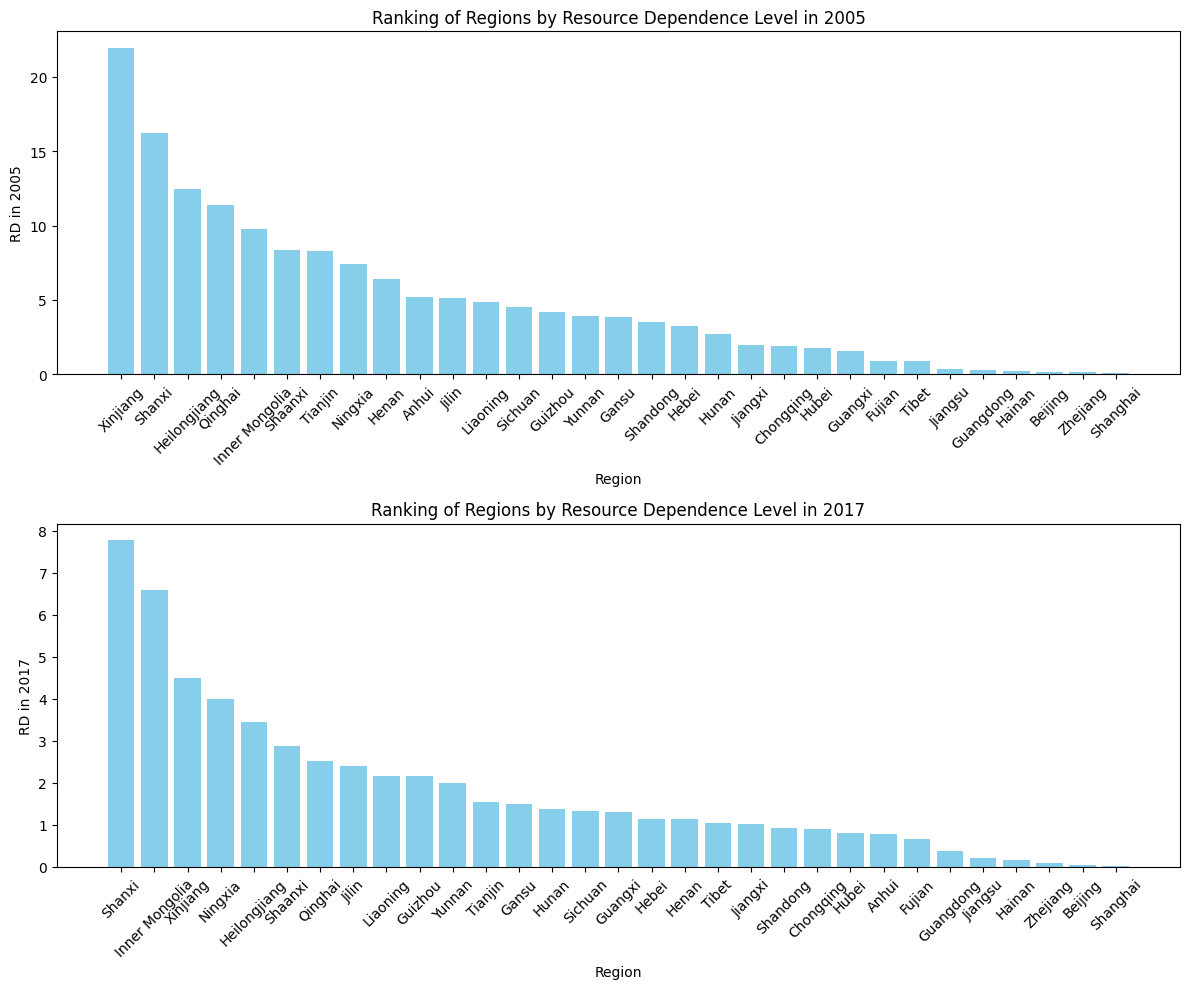

In [84]:


# 选择2005年的RD数据并按照大小排序
rd_2005 = RD.loc[:, "2005"]
rd_2017 = RD.loc[:, "2017"]
sorted_rd_2005 = rd_2005.sort_values(ascending=False)
sorted_rd_2017 = rd_2017.sort_values(ascending=False)

# 绘制竖直条形图
plt.figure(figsize=(12, 10))
plt.subplot(2,1,1)
plt.bar(sorted_rd_2005.index, sorted_rd_2005.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('RD in 2005')
plt.title('Ranking of Regions by Resource Dependence Level in 2005')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(2,1,2)
plt.bar(sorted_rd_2017.index, sorted_rd_2017.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('RD in 2017')
plt.title('Ranking of Regions by Resource Dependence Level in 2017')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

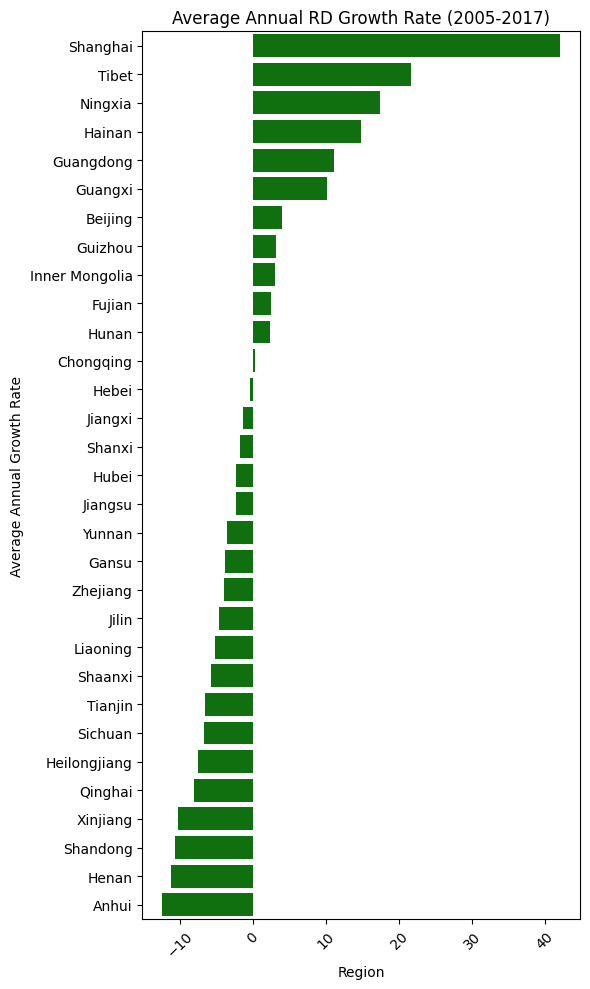

In [25]:

# 计算年度增长率
RD_gr = RD.pct_change(axis = 1)  # 使用pct_change()函数计算百分比变化

# 计算每个省份的平均增长率
RD_av_gr = RD_gr.mean(axis = 1) * 100  # 将增长率转换为百分比
RD_av_gr=RD_av_gr.sort_values(ascending = False)

# 绘制条形图
plt.figure(figsize=(6, 10))
sns.barplot( x= RD_av_gr.values,y=RD_av_gr.index,color='green')
plt.xlabel('Region')
plt.ylabel('Average Annual Growth Rate')
plt.title('Average Annual RD Growth Rate (2005-2017)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



In [18]:
RD_gr


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Region,,,,,,,,,,,,,,
Beijing,NaN,-0.284607,0.442433,0.390921,1.577412,-0.378296,-0.655978,-0.094011,-0.548886,0.889200,-0.217601,-0.666435,0.052496,0.014498
Tianjin,NaN,-0.126031,0.211075,-0.235203,0.028231,0.052072,-0.409916,-0.345159,-0.220863,0.434187,-0.167645,-0.251623,-0.617221,0.796172
Hebei,NaN,0.746544,0.367383,-0.043792,-0.049909,-0.278174,0.003592,0.205605,-0.102018,-0.056006,-0.169653,-0.229081,-0.269358,-0.181285
Shanxi,NaN,0.351135,-0.037695,-0.078680,0.048500,-0.074457,0.265725,0.143521,-0.114784,-0.250774,-0.143498,-0.124608,-0.259051,0.047525
Inner Mongolia,NaN,0.583890,0.245271,0.115300,0.233325,-0.211652,-0.154675,-0.153806,-0.001228,0.187547,-0.133362,-0.288216,-0.129402,0.100053
Liaoning,NaN,-0.011033,-0.079960,0.000679,-0.110762,-0.211752,0.252292,-0.220094,0.015395,-0.172781,-0.036123,-0.144231,-0.130604,0.171660
Jilin,NaN,-0.050788,0.384384,-0.083308,-0.010408,0.069042,-0.097423,-0.145862,0.086146,-0.278807,0.073245,-0.059466,-0.229140,-0.255365
Heilongjiang,NaN,0.183789,-0.038552,0.050801,0.023322,-0.224458,-0.138518,-0.119223,-0.190623,-0.099419,-0.065753,-0.128165,-0.237797,0.003027
Shanghai,NaN,-0.091390,0.134686,4.232792,0.683813,-0.751861,-0.951841,0.544376,-0.353590,-0.546939,-0.530633,0.894124,0.410478,1.796856


### Regional Comparison of Same year Scatter Plots

In [60]:
# # Scatter plot for Year 2005
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(gdf.loc[(slice(None), 2005), 'RD'], gdf.loc[(slice(None), 2005), 'GRPpcGrowth'], alpha=0.5)
# plt.axhline(gdf.loc[(slice(None), 2005), 'GRPpcGrowth'].mean(), color='red', linestyle='dashed', label='Mean GRPpcGrowth')
# plt.axvline(gdf.loc[(slice(None), 2005), 'RD'].mean(), color='blue', linestyle='dashed', label='Mean RD')
# for index, row in gdf.loc[(slice(None), 2005), :].iterrows():
#     plt.text(row['RD'], row['GRPpcGrowth'], index[0], ha='center', va='bottom')
# plt.xlabel('RD at Year 2005')
# plt.ylabel('GRPpcGrowth at Year 2005')
# plt.legend()

# # Scatter plot for Year 2017
# plt.subplot(1, 2, 2)
# plt.scatter(gdf.loc[(slice(None), 2017), 'RD'], gdf.loc[(slice(None), 2017), 'GRPpcGrowth'], alpha=0.5)
# plt.axhline(gdf.loc[(slice(None), 2017), 'GRPpcGrowth'].mean(), color='red', linestyle='dashed', label='Mean GRPpcGrowth')
# plt.axvline(gdf.loc[(slice(None), 2017), 'RD'].mean(), color='blue', linestyle='dashed', label='Mean RD')
# for index, row in gdf.loc[(slice(None), 2017), :].iterrows():
#     plt.text(row['RD'], row['GRPpcGrowth'], index[0], ha='center', va='bottom')
# plt.xlabel('RD at Year 2017')
# plt.ylabel('GRPpcGrowth at Year 2017')
# plt.legend()

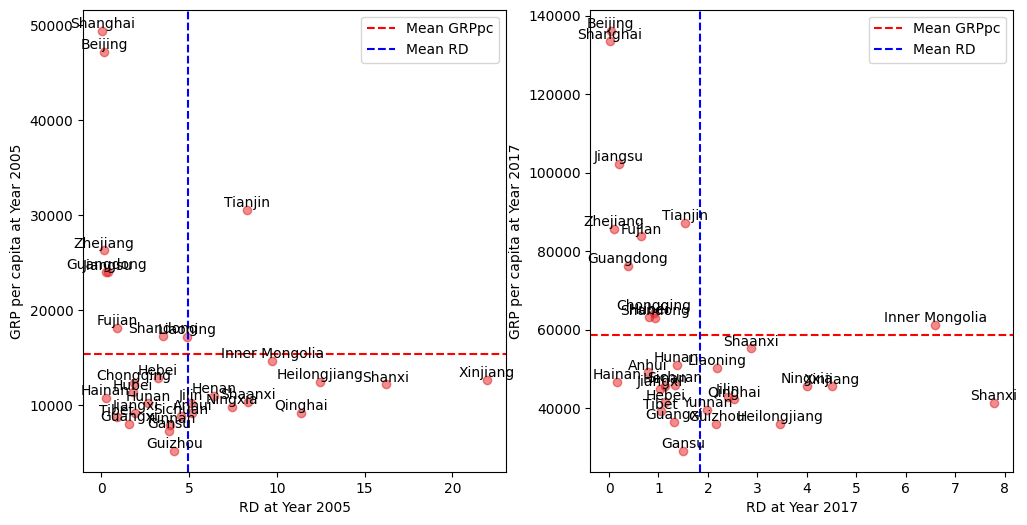

In [61]:
# Scatter plot for Year 2005
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(gdf.loc[(slice(None), 2005), 'RD'], gdf.loc[(slice(None), 2005), 'GRPpc'], alpha=0.5)
plt.axhline(gdf.loc[(slice(None), 2005), 'GRPpc'].mean(), color='red', linestyle='dashed', label='Mean GRPpc')
plt.axvline(gdf.loc[(slice(None), 2005), 'RD'].mean(), color='blue', linestyle='dashed', label='Mean RD')
for index, row in gdf.loc[(slice(None), 2005), :].iterrows():
    plt.text(row['RD'], row['GRPpc'], index[0], ha='center', va='bottom')
plt.xlabel('RD at Year 2005')
plt.ylabel('GRP per capita at Year 2005')
plt.legend()

# Scatter plot for Year 2017
plt.subplot(1, 2, 2)
plt.scatter(gdf.loc[(slice(None), 2017), 'RD'], gdf.loc[(slice(None), 2017), 'GRPpc'], alpha=0.5)
plt.axhline(gdf.loc[(slice(None), 2017), 'GRPpc'].mean(), color='red', linestyle='dashed', label='Mean GRPpc')
plt.axvline(gdf.loc[(slice(None), 2017), 'RD'].mean(), color='blue', linestyle='dashed', label='Mean RD')
for index, row in gdf.loc[(slice(None), 2017), :].iterrows():
    plt.text(row['RD'], row['GRPpc'], index[0], ha='center', va='bottom')
plt.xlabel('RD at Year 2017')
plt.ylabel('GRP per capita at Year 2017')
plt.legend()

### Pooled Bar plots

In [62]:
gdf_plt = gdf.copy()
gdf_plt['RD_sqrt'] = np.sqrt(gdf_plt['RD'])
gdf_plt['lnGRPpc'] = np.log(gdf_plt['GRPpc'])
gdf_plt['lnRD'] = np.log(gdf_plt['RD'])
gdf_plt['lnFDI'] = np.log(gdf_plt['FDI'])
gdf_plt['lnINN'] = np.log(gdf_plt['INN'])
gdf_plt['log_GRPpc'] = np.log10(gdf_plt['GRPpc'])
gdf_plt['log_RD'] = np.log10(gdf_plt['RD'])
gdf_plt['log_FDI'] = np.log10(gdf_plt['FDI'])
gdf_plt['log_INN'] = np.log10(gdf_plt['INN'])

<Figure size 1200x1200 with 0 Axes>

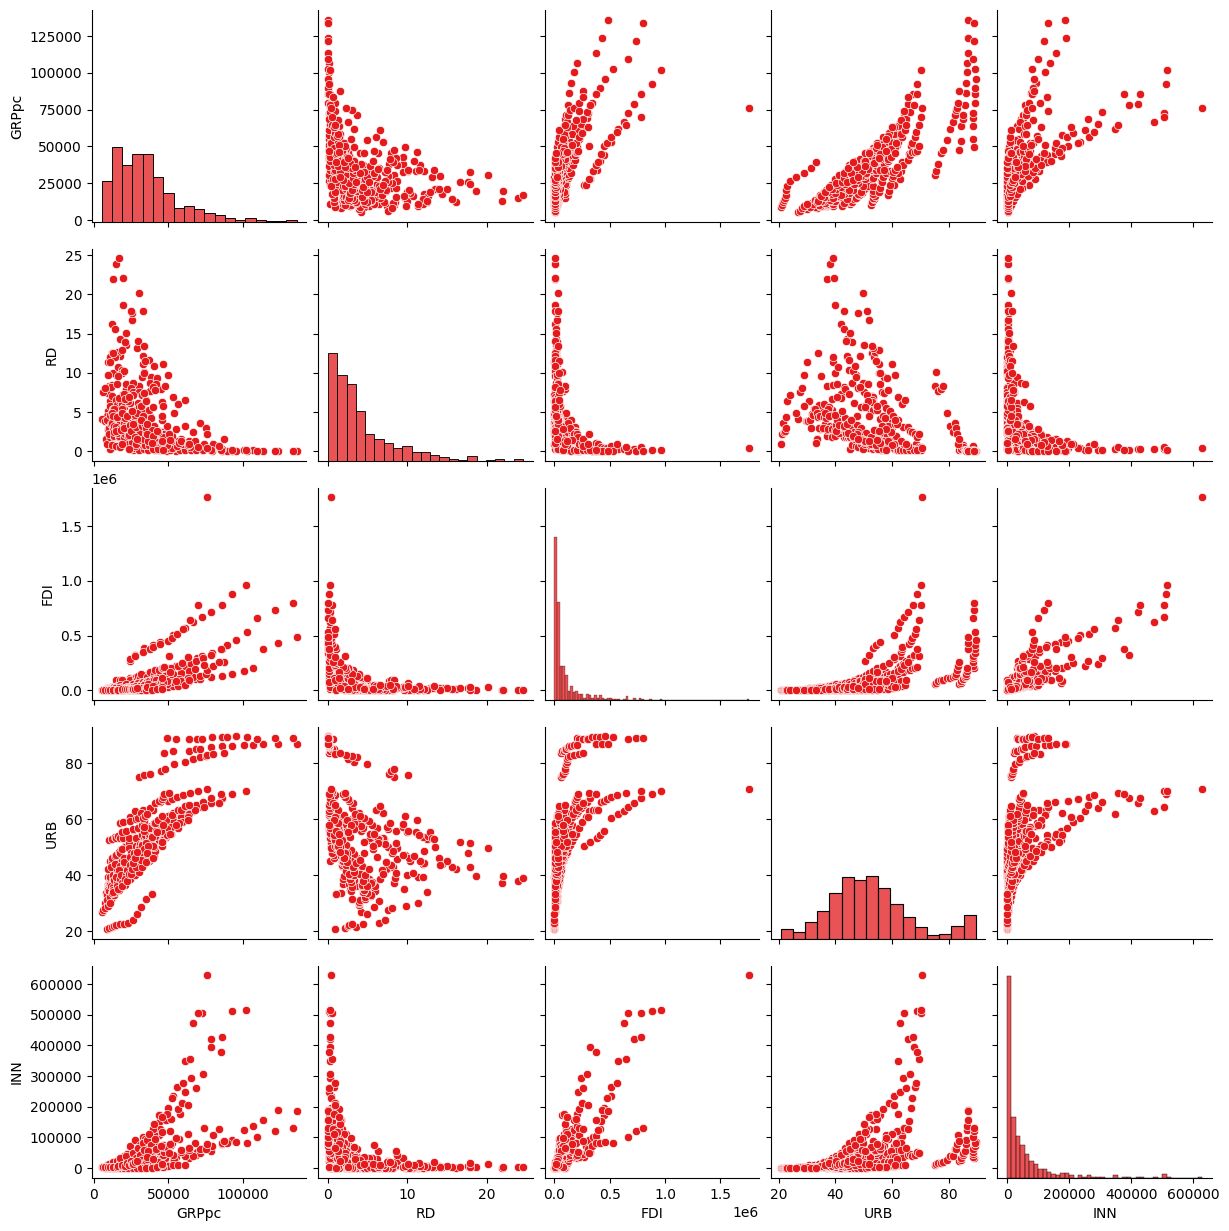

In [63]:
plt.figure(figsize = (12,12))
sns.pairplot(gdf_plt[['GRPpc','RD','FDI','URB','INN']])
plt.show()

<Figure size 1200x1200 with 0 Axes>

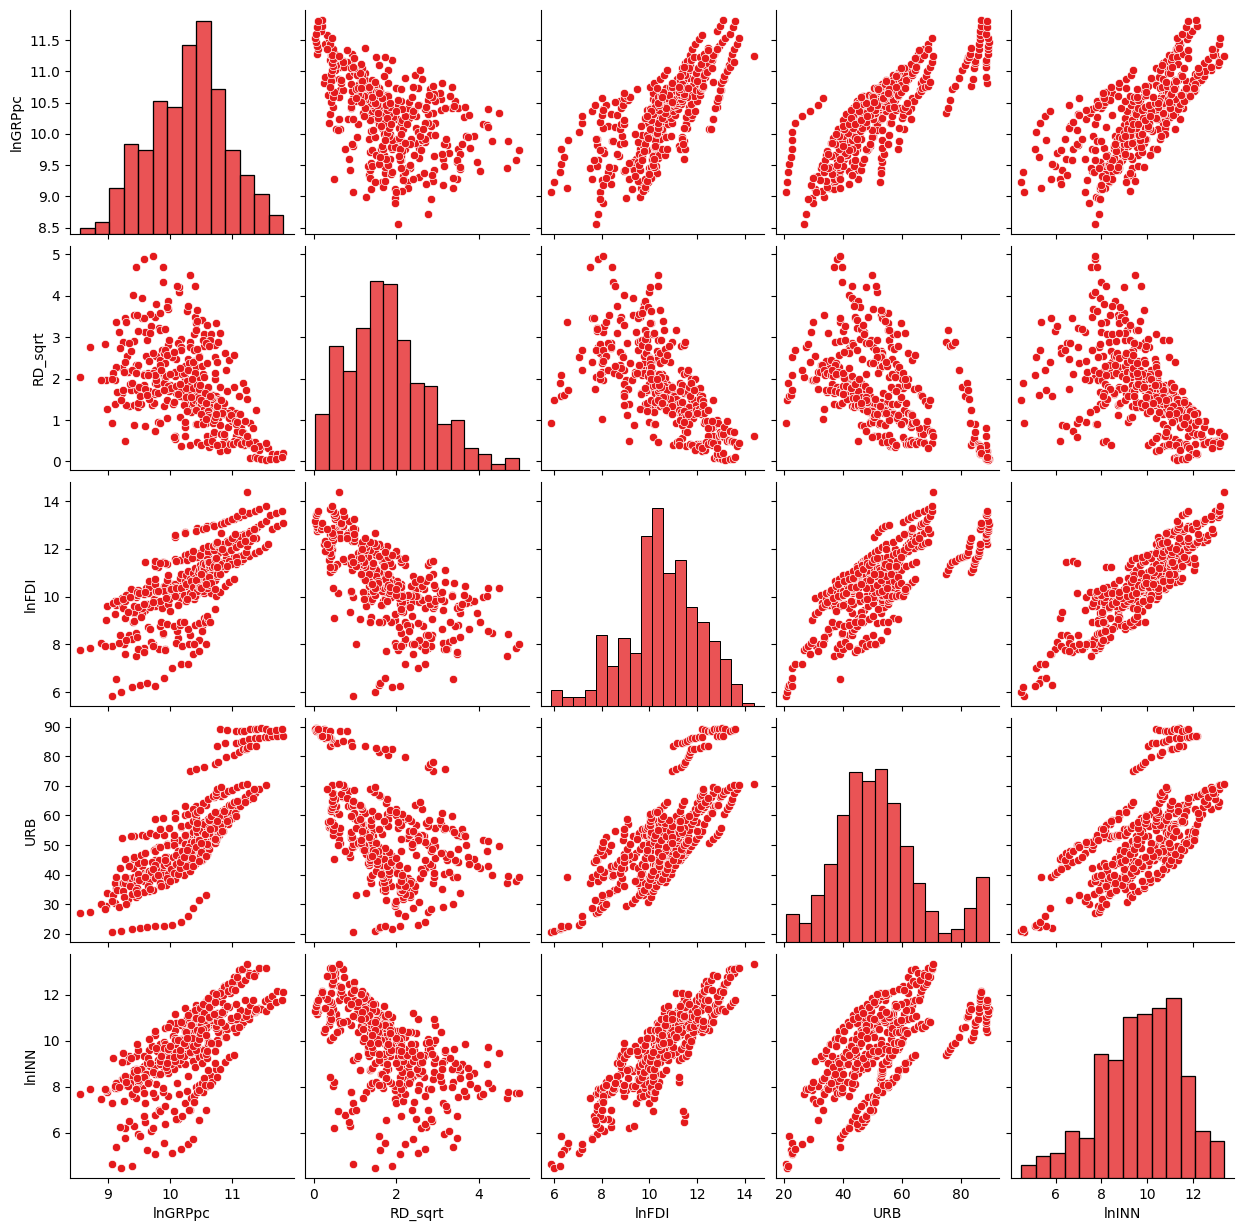

In [64]:
plt.figure(figsize = (12,12))
sns.pairplot(gdf_plt[['lnGRPpc','RD_sqrt','lnFDI','URB','lnINN']])
plt.show()

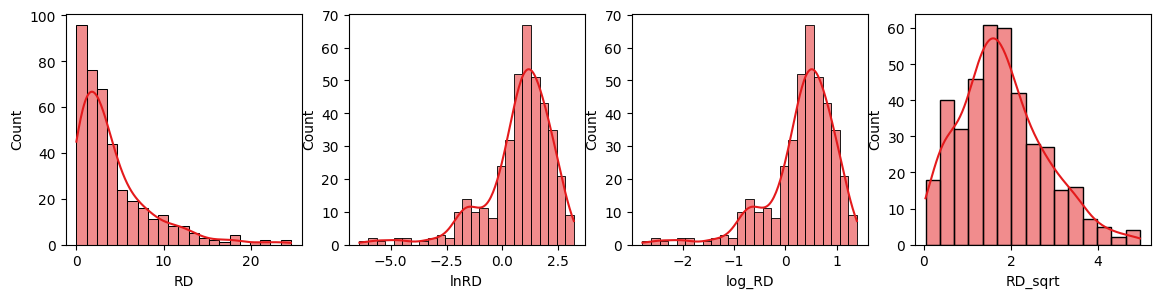

In [65]:
# Transformations on RD
plt.figure(figsize=(14, 3))
plt.subplot(1, 4, 1)
sns.histplot(gdf_plt['RD'],kde=True)
plt.subplot(1, 4, 2)
sns.histplot(gdf_plt['lnRD'],kde=True)
plt.subplot(1, 4, 3)
sns.histplot(gdf_plt['log_RD'],kde=True)
plt.subplot(1, 4, 4)
sns.histplot(gdf_plt['RD_sqrt'],kde=True)
plt.show()

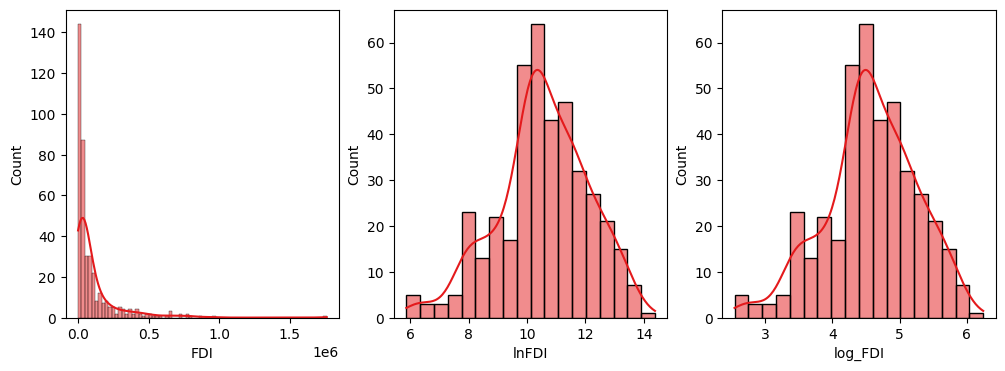

In [66]:
# Transformations on FDI
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(gdf_plt['FDI'],kde=True)
plt.subplot(1, 3, 2)
sns.histplot(gdf_plt['lnFDI'],kde=True)
plt.subplot(1, 3, 3)
sns.histplot(gdf_plt['log_FDI'],kde=True)
plt.show()

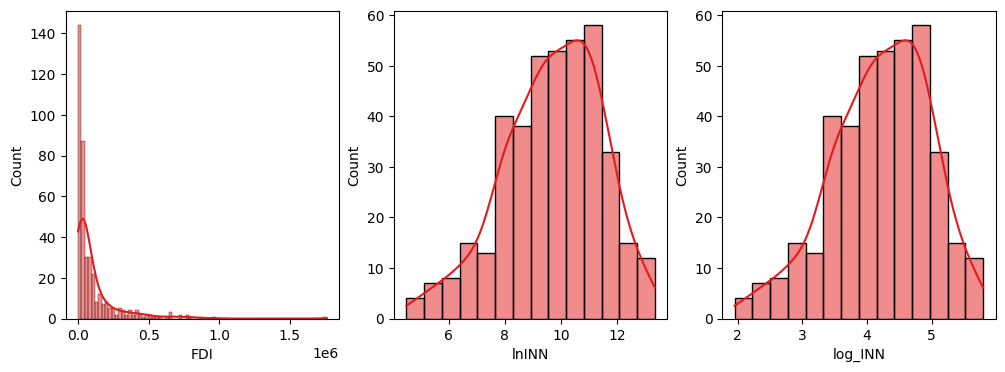

In [67]:
# Transformations on INN
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(gdf_plt['FDI'],kde=True)
plt.subplot(1, 3, 2)
sns.histplot(gdf_plt['lnINN'],kde=True)
plt.subplot(1, 3, 3)
sns.histplot(gdf_plt['log_INN'],kde=True)
plt.show()

As is shown on the plots above, the distribution resource Dependence, GRP per capita, FDI are all right-skewed, therefore we might consider log transformation later.

In [68]:
gdf['RD_sqrt'] = np.sqrt(gdf['RD'])
gdf['lnGRPpc'] = np.log(gdf['GRPpc'])
gdf['lnRD'] = np.log(gdf['RD'])
gdf['lnFDI'] = np.log(gdf['FDI'])
gdf['lnINN'] = np.log(gdf['INN'])
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 403 entries, ('Beijing', 2005) to ('Xinjiang', 2017)
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Area         403 non-null    object  
 1   GRPpc        403 non-null    int64   
 2   GRPpcGrowth  403 non-null    float64 
 3   RD           403 non-null    float64 
 4   FDI          403 non-null    int64   
 5   URB          403 non-null    float64 
 6   INN          403 non-null    int64   
 7   geometry     403 non-null    geometry
 8   RD_sqrt      403 non-null    float64 
 9   lnGRPpc      403 non-null    float64 
 10  lnRD         403 non-null    float64 
 11  lnFDI        403 non-null    float64 
 12  lnINN        403 non-null    float64 
dtypes: float64(8), geometry(1), int64(3), object(1)
memory usage: 43.8+ KB


In [69]:
gdf.drop(columns=['Year','Region'], axis = 1).to_file("merged_data.geojson", driver="GeoJSON", crs = gdf.crs)

KeyError: ignored

## Non-spatial Panel Regression

### Pooled Regression

In [ ]:
exog = sm.tools.tools.add_constant(gdf['RD_sqrt'])
endog = gdf['lnGRPpc']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids
print(pooledOLS_res.summary)

In [ ]:
# Scatter plot of GRPpc over RD with the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(gdf['RD_sqrt'], gdf['lnGRPpc'], alpha=0.5)
plt.plot(gdf['RD_sqrt'], fittedvals_pooled_OLS, color='red', label='Fitted Line')
plt.xlabel('RD_sqrt')
plt.ylabel('lnGRPpc')
plt.title('Scatter Plot of GRPpc over RD with Fitted Line')
plt.legend()
plt.show()

#### Homoskedasticity Test

In [ ]:
# Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue',marker='.')
ax.axhline(0, color = 'r', ls = '--')

ax.set_xlabel('Predicted Values',fontsize=10)
ax.set_ylabel('Residuals',fontsize=10)
ax.set_title('Homoskedasticity Test', fontsize = 20)
plt.show()


In [ ]:

# Run White Test for heteroskedasticity
white_test = het_white(pooledOLS_res.resids, exog)
print("White Test:")
print("LM Statistic:", white_test[0])
print("LM-Test p-value:", white_test[1])
print("F-Statistic:", white_test[2])
print("F-Test p-value:", white_test[3])

# Run Breusch-Pagan Test for heteroskedasticity
bp_test = het_breuschpagan(pooledOLS_res.resids, exog)
print("\nBreusch-Pagan Test:")
print("LM Statistic:", bp_test[0])
print("LM-Test p-value:", bp_test[1])
print("F-Statistic:", bp_test[2])
print("F-Test p-value:", bp_test[3])

The null hypotheses of both test cannot be rejected. Hence we assume the assumption of homoscedasticity is satisfied. LM stands for Lagrange Multiplier.

In [ ]:
# Durbin Watson Test for Autocorrelation
durbin_watson_test_results = durbin_watson(pooledOLS_res.resids)
print("Durbin-Watson Test Statistic:", durbin_watson_test_results)

The Durbin-Watson test statistic is a value that ranges from 0 to 4, with a value around 2 indicating no autocorrelation (residuals are independent), a value close to 0 indicating positive autocorrelation, and a value close to 4 indicating negative autocorrelation. If the Durbin-Watson test statistic is 0.623 in your case, it indicates that there is positive autocorrelation in the residuals of the pooled regression of GDPpc (Gross Domestic Product per capita) vs. RD (Resource Dependence). The residuals are positively correlated, suggesting that there is a pattern or structure in the errors that the model did not capture. This violates one of the assumptions of the classical linear regression model, which assumes that the errors are independent and identically distributed (i.e., no autocorrelation).

### FE and RE

In [ ]:
# FE und RE model
exog = sm.tools.tools.add_constant(gdf['RD_sqrt'])
endog = gdf['lnGRPpc']
# random effects model
model_re = RandomEffects(endog, exog)
re_res = model_re.fit()
# fixed effects model
model_fe = PanelOLS(endog, gdf['RD_sqrt'], entity_effects = True)
fe_res = model_fe.fit()
#print results
print(re_res)
print(fe_res)

In [ ]:
from linearmodels.panel import compare
print(compare({"RE": re_res, "FE": fe_res}))

1. **RandomEffects Estimation**:
- **R-squared**: Represents the overall proportion of variation in the dependent variable explained by the model. An R-squared of `0.2736` indicates that 27.36% of the variation in `lnGRPpc` is explained by the model with `RD_sqrt` as the predictor.

- **R-squared (Between)**: Reflects the proportion of variation *between* the entities (e.g., countries, firms) explained by the model. A value of `0.0692` means that the model accounts for 6.92% of the between-entity variation in the dependent variable.

- **R-squared (Within)**: Captures the proportion of variation *within* entities over time explained by the model. A value of `0.2898` implies the model explains 28.98% of the within-entity (or over-time) variation in the dependent variable.

- **R-squared (Overall)**: A weighted average of the between and within R-squared values, signifying the total proportion of variation in the dependent variable explained by the model. A value of `0.1868` indicates the model captures 18.68% of the overall variation.

2. **PanelOLS (Fixed Effects) Estimation**:
- **R-squared**: This value measures the within-entity R-squared, signifying the proportion of variation in the dependent variable occurring over time (within entities) that the model explains. A score of `0.2978` means the model accounts for 29.78% of the within-entity variation in `lnGRPpc`.

- **R-squared (Between)**: This score measures the proportion of variation *between* entities explained by the model. However, given the fixed effects nature of this model, this isn't the primary point of interest. A negative value, like `-0.2175`, might arise due to the de-meaning process in the fixed effects model and isn't necessarily concerning.

- **R-squared (Within)**: This is essentially a repetition in the context of PanelOLS (Fixed Effects) because it mirrors the primary R-squared. It indicates the share of within-entity variation in the dependent variable that the model explains.

- **R-squared (Overall)**: This value reflects the proportion of the total variation in the dependent variable that the model explains, considering both between and within variations. The negative value of `-0.2165` can arise in fixed effects models when the variation between entities isn't effectively explained by the model.
-**Test for Poolability**: The F-test for poolability with a value of 11.979 tests the null hypothesis that the entity-specific effects are all zero. A very low p-value (0.0000) rejects this hypothesis, providing statistical support for the use of a fixed effects model. In other words, it suggests that there are indeed entity-specific effects that are important to consider in the model.

**To Summarize**:
- Both models present a reasonably good fit within entities over time, elucidating around 27% to 30% of the within variation in the dependent variable.
- The RandomEffects model captures some of the between-entity variation, but the Fixed Effects model doesn't, which is evident in the negative R-squared (Between) and R-squared (Overall) for the latter.
- The choice between RandomEffects and Fixed Effects should be grounded in the nature of the data and the foundational assumptions about unobserved entity-specific effects. If these effects are believed to correlate with the predictor (`RD_sqrt`), a Fixed Effects model is more suitable. Otherwise, a RandomEffects model may be more appropriate.
You can use this markdown code in platforms that support markdown rendering, like GitHub, Jupyter notebooks, etc.






*  Both the random effects and fixed effects models have low p-values (close to 0.0000), indicating that the models are statistically significant.
*  In both models, the coefficient for RD is negative. This means that there is a negative relationship between RD and GRPpc.
* The p-value for the F-test for poolability is close to 0.0000, indicating that we reject the null hypothesis of poolability. This means that the individual entities have different effects on the dependent variable, and the fixed effects model is more appropriate.



In [ ]:
# Hausman Test
def hausman(fe, re):
 b = fe.params
 B = re.params
 v_b = fe.cov
 v_B = re.cov
 df = b[np.abs(b) < 1e8].size
 chi2 = np.dot((b-B).T, la.inv(v_b - v_B).dot(b - B))

 pval = stats.chi2.sf(chi2, df)
 return chi2, df, pval

hausman_results = hausman(fe_res, re_res)
print('chi-Squared:'  + str(hausman_results[0]))
print('degrees of freedom:'  + str(hausman_results[1]))
print('p-Value:'  + str(hausman_results[2]))

The null hypothesis of Hausman test is that the random effect model is better. Here the p value is 0.506779589386793 which is higher than conventional significance level 0.05, so we could not reject the null hypothesis. The fixed effect model is better here.

### Multivariable regression.

In [ ]:
# import statsmodels.api as sm
# from linearmodels.panel import PanelOLS, RandomEffects

# Pooled Panel Regression
exog_pooled = sm.add_constant(gdf[['RD_sqrt', 'lnFDI', 'URB','lnINN']])
endog_pooled = gdf['lnGRPpc']
pooled_model = sm.OLS(endog_pooled, exog_pooled).fit()
print(pooled_model.summary())

# Fixed Effects Panel Regression
exog_fe = sm.add_constant(gdf[['RD_sqrt', 'lnFDI', 'URB','lnINN']])
endog_fe = gdf['lnGRPpc']
fe_model = PanelOLS(endog_fe, exog_fe, entity_effects=True).fit()
print(fe_model.summary)

# Random Effects Panel Regression
exog_re = sm.add_constant(gdf[['RD_sqrt', 'lnFDI', 'URB','lnINN']])
endog_re = gdf['lnGRPpc']
re_model = RandomEffects(endog_re, exog_re).fit()
print(re_model.summary)

In [ ]:
# Summarize the individual effect of both models
fe_effects = fe_model.estimated_effects.rename(columns = {'estimated_effects':'fixed_effects'}).groupby('Region').mean()
re_effects = re_model.estimated_effects.rename(columns = {'estimated_effects':'random_effects'}).groupby('Region').mean()
average_effects = fe_effects.merge(re_effects,left_index = True, right_index = True)
average_effects = average_effects.merge(bd, how = "left", left_on = "Region",right_on = "NAME")
average_effects = gpd.GeoDataFrame(average_effects, geometry='geometry')
average_effects.head()

In [ ]:
# Plotting choropleth maps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Choropleth map for RD values at year 2005
average_effects.plot(column="fixed_effects", cmap="RdBu", linewidth=0.8, edgecolor="0.8", legend=True,ax = ax1)
ax1.set_title("Individual Effects in Fixed Effect Model")
ax1.axis("off")

# Choropleth map for RD values at year 2017
average_effects.plot(column="random_effects", cmap="RdBu", linewidth=0.8, edgecolor="0.8", legend=True, ax = ax2)
ax2.set_title("Individual Effects in Random Effect Model")
ax2.axis("off")

# Show the plot
plt.show()


The Jarque-Bera test is a statistical test that compares whether sample data have the skewness and kurtosis matching a normal distribution. The null hypothesis for the test is that the data are normally distributed.

In [ ]:
# Normality Test
from scipy.stats import jarque_bera

jb_fe = jarque_bera(fe_model.resids)
jb_re = jarque_bera(re_model.resids)

print(f"FE Model: Jarque-Bera statistic = {jb_fe[0]}, p-value = {jb_fe[1]}")
print(f"RE Model: Jarque-Bera statistic = {jb_re[0]}, p-value = {jb_re[1]}")


The results from the Jarque-Bera test indicate that the residuals (errors) from both the FE and RE models do not follow a normal distribution. This might suggest potential issues with the models, as normally distributed residuals are one of the assumptions behind many statistical tests and models.

In [ ]:
# # Test for Serial Correlation
# from linearmodels.panel.diagnostic import wooldridge_test
# print(wooldridge_test(fe_model))
# print(wooldridge_test(re_model))

The Breusch-Pagan test is used to detect the presence of heteroscedasticity in the residuals of a regression model. The null hypothesis $H_0$
  for the test is that the error variances are all equal (no heteroscedasticity), and the alternative hypothesis $H_1$
  is that the error variances are not equal (heteroscedasticity is present).

In [ ]:
# Breusch-Pagan Test for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test_fe = het_breuschpagan(fe_model.resids, exog_fe)
bp_test_re = het_breuschpagan(re_model.resids, exog_re)

print(f"FE Model: Breusch-Pagan test LM statistic = {bp_test_fe[0]}, p-value = {bp_test_fe[1]}")
print(f"RE Model: Breusch-Pagan test LM statistic = {bp_test_re[0]}, p-value = {bp_test_re[1]}")


Both the fixed effects and random effects models show evidence of heteroscedasticity in their residuals based on the Breusch-Pagan test results. This suggests that the error terms do not have a constant variance.

In [ ]:
# from linearmodels.panel import PanelOLS
# from linearmodels.panel.results import PanelModelComparison

# comparison = PanelModelComparison({'FE': fe_model, 'RE': re_model}, weights=True)
# print(comparison.first_difference.diagnostics)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(fe_model.predict(), fe_model.resids, alpha=0.5)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title("FE Model: Residuals vs. Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.scatter(re_model.predict(), re_model.resids, alpha=0.5)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title("RE Model: Residuals vs. Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


In [ ]:
#Hausman Test
def hausman(fe, re):
  b = fe.params
  B = re.params
  v_b = fe.cov
  v_B = re.cov

  df = b[np.abs(b) < 1e8].size
  chi2 = np.dot((b-B).T,
                la.inv(v_b-v_B).dot(b-B))
  pval = stats.chi2.sf(chi2, df)
  return chi2, df, pval

hausman_results = hausman(fe_model, re_model)
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    return vif_data

## Spatial Analysis

### Spatial Weight Matrix

In [ ]:
import geopandas as gpd
import libpysal as lps

# Create the spatial weights matrix using Queen contiguity
w = lps.weights.Queen.from_dataframe(bd)

# Find the index of the island (from the warning it is 18) and Guangdong
island_index = 18
guangdong_index = bd[bd['NAME'] == 'Guangdong'].index[0]

# Make the island a neighbor of Guangdong and vice versa
if island_index not in w.neighbors[guangdong_index]:
    w.neighbors[guangdong_index].append(island_index)
    w.weights[guangdong_index].append(1)

if guangdong_index not in w.neighbors[island_index]:
    w.neighbors[island_index].append(guangdong_index)
    w.weights[island_index].append(1)

# Row-standardize the matrix
w.transform = 'R'
# Display the results
w.neighbors

### Spatial Autocorrelation Analysis


In [ ]:
# import geopandas as gpd
# import libpysal as lps
from esda.moran import Moran

# Create a list to hold results
morans = []

# For each unique year in the gdf
for year in gdf.index.get_level_values('Year').unique():
    # Filter data for that specific year
    year_data = gdf.xs(year, level='Year')

    # Compute Moran's I
    mi = Moran(year_data['GRPpc'], w)

    morans.append((year, mi.I, mi.p_sim))

# Convert results to a numpy array for easier viewing
morans = np.array(morans)

# Print the results
for year, I, p in morans:
    print(f"Year: {int(year)}, Moran's I: {I:.5f}, p-value: {p:.5f}")